##  Munich Venues and Airbnb prices
### Import Libraries

In [102]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
!pip install geocoder
!pip install geopy
import geocoder as geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [103]:
path='http://data.insideairbnb.com/germany/bv/munich/2020-05-24/visualisations/listings.csv'
df = pd.read_csv(path)
df.head()

id                                             name  host_id host_name  \
0   36720              Beautiful 2 rooms flat, Glockenbach   158413  Gabriela   
1   49309  Sublet - Apartment with Balcony in Downtown (1)   224802    Damien   
2   97945                 Deluxw-Apartm. with roof terrace   517685  Angelika   
3  114695               Apartment Munich/East with sundeck   581737   Stephan   
4  127383                City apartment next to Pinakothek   630556     Sonja   

   neighbourhood_group                 neighbourhood  latitude  longitude  \
0                  NaN  Ludwigsvorstadt-Isarvorstadt  48.13057   11.56929   
1                  NaN  Ludwigsvorstadt-Isarvorstadt  48.12456   11.55567   
2                  NaN                        Hadern  48.11476   11.48782   
3                  NaN                  Berg am Laim  48.11923   11.63726   
4                  NaN                   Maxvorstadt  48.15198   11.56486   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt     95               2                 25  2017-07-22   
1     Private room     40              14                 40  2017-10-15   
2  Entire home/apt     80               2                131  2019-10-03   
3  Entire home/apt     95               2                 53  2019-10-06   
4  Entire home/apt    120               2                 84  2020-03-01   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.34                               1                 0  
1               0.34                               1               330  
2               1.24                               2                59  
3               0.49                               2               117  
4               0.77                               2                 0

## Get Munich Airbnb data

In [104]:
df.drop(columns=['name','host_id','host_name','neighbourhood_group','minimum_nights','number_of_reviews','last_review','reviews_per_month',\
                 'calculated_host_listings_count','availability_365'],inplace=True)
df.head()

id                 neighbourhood  latitude  longitude        room_type  \
0   36720  Ludwigsvorstadt-Isarvorstadt  48.13057   11.56929  Entire home/apt   
1   49309  Ludwigsvorstadt-Isarvorstadt  48.12456   11.55567     Private room   
2   97945                        Hadern  48.11476   11.48782  Entire home/apt   
3  114695                  Berg am Laim  48.11923   11.63726  Entire home/apt   
4  127383                   Maxvorstadt  48.15198   11.56486  Entire home/apt   

   price  
0     95  
1     40  
2     80  
3     95  
4    120

In [105]:
df.shape

(11128, 6)

In [106]:
df2 = df[df['price'] < 1001]
df2.shape

(11108, 6)

In [107]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

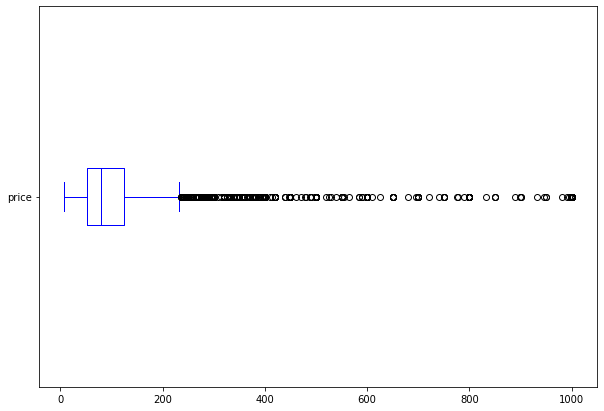

In [45]:
df2['price'].plot(kind='box', figsize=(10, 7), color='blue', vert=False)
plt.show()

In [110]:

ave_df2 = df2.groupby('neighbourhood', axis=0).mean()

In [109]:
ave_df2

id   latitude  \
neighbourhood                                                                 
Allach-Untermenzing                                 2.485720e+07  48.185855   
Altstadt-Lehel                                      2.456336e+07  48.137648   
Au-Haidhausen                                       2.186245e+07  48.128345   
Aubing-Lochhausen-Langwied                          2.542403e+07  48.156345   
Berg am Laim                                        2.196426e+07  48.126613   
Bogenhausen                                         2.321498e+07  48.151770   
Feldmoching-Hasenbergl                              2.405110e+07  48.205644   
Hadern                                              2.547486e+07  48.117823   
Laim                                                2.238008e+07  48.137006   
Ludwigsvorstadt-Isarvorstadt                        2.271899e+07  48.129925   
Maxvorstadt                                         2.269014e+07  48.150448   
Milbertshofen-Am Hart                               2.415293e+07  48.186282   
Moosach                                             2.847124e+07  48.180258   
Neuhausen-Nymphenburg                               2.247708e+07  48.153873   
Obergiesing                                         2.296481e+07  48.111455   
Pasing-Obermenzing                                  2.427333e+07  48.150086   
Ramersdorf-Perlach                                  2.486991e+07  48.105595   
Schwabing-Freimann                                  2.346025e+07  48.171757   
Schwabing-West                                      2.332794e+07  48.163969   
Schwanthalerhöhe                                    2.221381e+07  48.136602   
Sendling                                            2.186637e+07  48.117640   
Sendling-Westpark                                   2.241257e+07  48.116751   
Thalkirchen-Obersendling-Forstenried-Fürstenrie...  2.307993e+07  48.092621   
Tudering-Riem                                       2.561613e+07  48.124694   
Untergiesing-Harlaching                             2.119057e+07  48.107136   

                                                    longitude       price  
neighbourhood                                                              
Allach-Untermenzing                                 11.465515  104.214286  
Altstadt-Lehel                                      11.581302  158.171875  
Au-Haidhausen                                       11.593697  114.542777  
Aubing-Lochhausen-Langwied                          11.420487   96.602273  
Berg am Laim                                        11.630081   96.606635  
Bogenhausen                                         11.625256   93.848723  
Feldmoching-Hasenbergl                              11.540910   97.292035  
Hadern                                              11.484957   83.829630  
Laim                                                11.508123   91.911458  
Ludwigsvorstadt-Isarvorstadt                        11.562916  141.768786  
Maxvorstadt                                         11.565523  116.842007  
Milbertshofen-Am Hart                               11.566901   87.632035  
Moosach                                             11.521115   88.582329  
Neuhausen-Nymphenburg                               11.533594  104.026247  
Obergiesing                                         11.586711  103.824934  
Pasing-Obermenzing                                  11.463243  100.737778  
Ramersdorf-Perlach                                  11.626658   82.430622  
Schwabing-Freimann                                  11.592170  102.291874  
Schwabing-West                                      11.570419  108.276570  
Schwanthalerhöhe                                    11.540022  131.410377  
Sendling                                            11.544175  114.029478  
Sendling-Westpark                                   11.525741  107.761780  
Thalkirchen-Obersendling-Forstenried-Fürstenrie...  11.518454   97.771712  
Tudering-Riem               

## Airbnb in Map

In [111]:
#creating Munich Map
address = 'Munich'

geolocator = Nominatim(user_agent="ldn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Munich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Munich are 48.1371079, 11.5753822.


In [67]:
!pip install folium
map_munich = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df2['latitude'], df2['longitude'], df2['neighbourhood']):
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

In [112]:
ave_df2.drop(columns=['id'],inplace=True)
ave_df2.reset_index(inplace = True)

In [113]:
ave_df2

neighbourhood   latitude  longitude  \
0                                 Allach-Untermenzing  48.185855  11.465515   
1                                      Altstadt-Lehel  48.137648  11.581302   
2                                       Au-Haidhausen  48.128345  11.593697   
3                          Aubing-Lochhausen-Langwied  48.156345  11.420487   
4                                        Berg am Laim  48.126613  11.630081   
5                                         Bogenhausen  48.151770  11.625256   
6                              Feldmoching-Hasenbergl  48.205644  11.540910   
7                                              Hadern  48.117823  11.484957   
8                                                Laim  48.137006  11.508123   
9                        Ludwigsvorstadt-Isarvorstadt  48.129925  11.562916   
10                                        Maxvorstadt  48.150448  11.565523   
11                              Milbertshofen-Am Hart  48.186282  11.566901   
12                                            Moosach  48.180258  11.521115   
13                              Neuhausen-Nymphenburg  48.153873  11.533594   
14                                        Obergiesing  48.111455  11.586711   
15                                 Pasing-Obermenzing  48.150086  11.463243   
16                                 Ramersdorf-Perlach  48.105595  11.626658   
17                                 Schwabing-Freimann  48.171757  11.592170   
18                                     Schwabing-West  48.163969  11.570419   
19                                   Schwanthalerhöhe  48.136602  11.540022   
20                                           Sendling  48.117640  11.544175   
21                                  Sendling-Westpark  48.116751  11.525741   
22  Thalkirchen-Obersendling-Forstenried-Fürstenri...  48.092621  11.518454   
23                                      Tudering-Riem  48.124694  11.682527   
24                            Untergiesing-Harlaching  48.107136  11.570519   

         price  
0   104.214286  
1   158.171875  
2   114.542777  
3    96.602273  
4    96.606635  
5    93.848723  
6    97.292035  
7    83.829630  
8    91.911458  
9   141.768786  
10  116.842007  
11   87.632035  
12   88.582329  
13  104.026247  
14  103.824934  
15  100.737778  
16   82.430622  
17  102.291874  
18  108.276570  
19  131.410377  
20  114.029478  
21  107.761780  
22   97.771712  
23  124.843333  
24   98.902941

## Foursquare and Venues

In [114]:
CLIENT_ID = 'JDKQ13W24Z43KE4QJZGZO1XATV1KOBLQPOLQ2FW0XB3Y00NV' # your Foursquare ID
CLIENT_SECRET = 'U2P4E3XZXDHIOT0EPAMCMVHVWKS0Y5RKZYGIJY2PEDJ2PSVF' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

In [115]:
!pip install requests
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [73]:
munich_venues = getNearbyVenues(names=ave_df2['neighbourhood'],
                                   latitudes=ave_df2['latitude'],
                                   longitudes=ave_df2['longitude']
                                  )

Allach-Untermenzing
Altstadt-Lehel
Au-Haidhausen
Aubing-Lochhausen-Langwied
Berg am Laim
Bogenhausen
Feldmoching-Hasenbergl
Hadern
Laim
Ludwigsvorstadt-Isarvorstadt
Maxvorstadt
Milbertshofen-Am Hart
Moosach
Neuhausen-Nymphenburg
Obergiesing
Pasing-Obermenzing
Ramersdorf-Perlach
Schwabing-Freimann
Schwabing-West
Schwanthalerhöhe
Sendling
Sendling-Westpark
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln
Tudering-Riem
Untergiesing-Harlaching


In [116]:
print(munich_venues.shape)
munich_venues.head()

(732, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Allach-Untermenzing              48.185855               11.465515   
1  Allach-Untermenzing              48.185855               11.465515   
2  Allach-Untermenzing              48.185855               11.465515   
3  Allach-Untermenzing              48.185855               11.465515   
4  Allach-Untermenzing              48.185855               11.465515   

                      Venue  Venue Latitude  Venue Longitude  \
0           Trattoria Olive       48.189905        11.466970   
1                Würmtalhof       48.188834        11.460680   
2         Sportforum Allach       48.186011        11.468422   
3  Sport Bittl Lagerverkauf       48.186025        11.468463   
4                    Ever.s       48.188870        11.467661   

        Venue Category  
0    Trattoria/Osteria  
1    German Restaurant  
2                  Gym  
3  Sporting Goods Shop  
4        Shopping Mall

In [117]:
munich_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Allach-Untermenzing                                                    11   
Altstadt-Lehel                                                         98   
Au-Haidhausen                                                          45   
Aubing-Lochhausen-Langwied                                              6   
Berg am Laim                                                           14   
Bogenhausen                                                            28   
Feldmoching-Hasenbergl                                                  7   
Hadern                                                                 12   
Laim                                                                   25   
Ludwigsvorstadt-Isarvorstadt                                           39   
Maxvorstadt                                                            53   
Milbertshofen-Am Hart                                                  41   
Moosach                                                                12   
Neuhausen-Nymphenburg                                                  41   
Obergiesing                                                             8   
Pasing-Obermenzing                                                     55   
Ramersdorf-Perlach                                                      8   
Schwabing-Freimann                                                     36   
Schwabing-West                                                         56   
Schwanthalerhöhe                                                       53   
Sendling                                                               38   
Sendling-Westpark                                                      12   
Thalkirchen-Obersendling-Forstenried-Fürstenrie...                     20   
Tudering-Riem                                                           2   
Untergiesing-Harlaching                                                12   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Allach-Untermenzing                                                     11   
Altstadt-Lehel                                                          98   
Au-Haidhausen                                                           45   
Aubing-Lochhausen-Langwied                                               6   
Berg am Laim                                                            14   
Bogenhausen                                                             28   
Feldmoching-Hasenbergl                                                   7   
Hadern                                                                  12   
Laim                                                                    25   
Ludwigsvorstadt-Isarvorstadt                                            39   
Maxvorstadt                                                             53   
Milbertshofen-Am Hart                                                   41   
Moosach                                                                 12   
Neuhausen-Nymphenburg                                                   41   
Obergiesing                                                              8   
Pasing-Obermenzing                                                      55   
Ramersdorf-Perlach                                                       8   
Schwabing-Freimann                                                      36   
Schwabing-West                                                          56   
Schwanthalerhöhe                                                        53   
Sendling                                                                38   
Sendling-Westpark                                                       12   
Thalkirchen-Obersendling-Forstenried-Fürstenrie...                      20   
Tudering-Riem         

In [118]:
# one hot encoding
munich_onehot = pd.get_dummies(munich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
munich_onehot['Neighborhood'] = munich_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [munich_onehot.columns[-1]] + list(munich_onehot.columns[:-1])
munich_onehot = munich_onehot[fixed_columns]

munich_onehot.head()

Yoga Studio  Afghan Restaurant  Arcade  Argentinian Restaurant  \
0            0                  0       0                       0   
1            0                  0       0                       0   
2            0                  0       0                       0   
3            0                  0       0                       0   
4            0                  0       0                       0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0            0           0                    0                 0   
1            0           0                    0                 0   
2            0           0                    0                 0   
3            0           0                    0                 0   
4            0           0                    0                 0   

   Athletics & Sports  Austrian Restaurant  Auto Workshop  Automotive Shop  \
0                   0                    0              0                0   
1                   0                    0              0                0   
2                   0                    0              0                0   
3                   0                    0              0                0   
4                   0                    0              0                0   

   Bagel Shop  Bakery  Bank  Bar  Bavarian Restaurant  Beer Garden  \
0           0       0     0    0                    0            0   
1           0       0     0    0                    0            0   
2           0       0     0    0                    0            0   
3           0       0     0    0                    0            0   
4           0       0     0    0                    0            0   

   Beer Store  Big Box Store  Bistro  Bookstore  Bosnian Restaurant  Boutique  \
0           0              0       0          0                   0         0   
1           0              0       0          0                   0         0   
2           0              0       0          0                   0         0   
3           0              0       0          0                   0         0   
4           0              0       0          0                   0         0   

   Breakfast Spot  Brewery  Burger Joint  Burrito Place  Bus Stop  Butcher  \
0               0        0             0              0         0        0   
1               0        0             0              0         0        0   
2               0        0             0              0         0        0   
3               0        0             0              0         0        0   
4               0        0             0              0         0        0   

   Café  Candy Store  Caucasian Restaurant  Cemetery  Chinese Restaurant  \
0     0            0                     0         0                   0   
1     0            0                     0         0                   0   
2     0            0                     0         0                   0   
3     0            0                     0         0                   0   
4     0            0                     0         0                   0   

   Church  Clothing Store  Cocktail Bar  Coffee Shop  College Cafeteria  \
0       0               0             0            0                  0   
1       0               0             0            0                  0   
2       0               0             0            0                  0   
3       0               0             0            0                  0   
4       0               0             0            0                  0   

   Comedy Club  Concert Hall  Convenience Store  Cultural Center  \
0            0             0                  0                0   
1            0             0                  0                0   
2            0             0                  0                0   
3            0             0                  0                0   
4            0             0                  0                0   

   Departm

In [119]:
munich_onehot.shape

(732, 162)

In [120]:
munich_grouped = munich_onehot.groupby('Neighborhood').mean().reset_index()
munich_grouped

Neighborhood  Yoga Studio  \
0                                 Allach-Untermenzing     0.000000   
1                                      Altstadt-Lehel     0.000000   
2                                       Au-Haidhausen     0.000000   
3                          Aubing-Lochhausen-Langwied     0.000000   
4                                        Berg am Laim     0.000000   
5                                         Bogenhausen     0.000000   
6                              Feldmoching-Hasenbergl     0.000000   
7                                              Hadern     0.000000   
8                                                Laim     0.000000   
9                        Ludwigsvorstadt-Isarvorstadt     0.000000   
10                                        Maxvorstadt     0.000000   
11                              Milbertshofen-Am Hart     0.000000   
12                                            Moosach     0.000000   
13                              Neuhausen-Nymphenburg     0.024390   
14                                        Obergiesing     0.000000   
15                                 Pasing-Obermenzing     0.000000   
16                                 Ramersdorf-Perlach     0.000000   
17                                 Schwabing-Freimann     0.000000   
18                                     Schwabing-West     0.000000   
19                                   Schwanthalerhöhe     0.018868   
20                                           Sendling     0.000000   
21                                  Sendling-Westpark     0.000000   
22  Thalkirchen-Obersendling-Forstenried-Fürstenri...     0.000000   
23                                      Tudering-Riem     0.000000   
24                            Untergiesing-Harlaching     0.000000   

    Afghan Restaurant    Arcade  Argentinian Restaurant  Art Gallery  \
0            0.000000  0.000000                0.000000     0.000000   
1            0.010204  0.000000                0.010204     0.000000   
2            0.000000  0.000000                0.000000     0.000000   
3            0.000000  0.000000                0.000000     0.000000   
4            0.000000  0.000000                0.000000     0.000000   
5            0.000000  0.000000                0.000000     0.000000   
6            0.000000  0.000000                0.000000     0.000000   
7            0.000000  0.000000                0.000000     0.000000   
8            0.000000  0.000000                0.000000     0.000000   
9            0.000000  0.000000                0.000000     0.025641   
10           0.000000  0.018868                0.000000     0.000000   
11           0.000000  0.000000                0.000000     0.000000   
12           0.000000  0.000000                0.000000     0.000000   
13           0.000000  0.000000                0.000000     0.000000   
14           0.000000  0.000000                0.000000     0.000000   
15           0.000000  0.000000                0.000000     0.000000   
16           0.000000  0.000000                0.000000     0.000000   
17           0.000000  0.000000                0.000000     0.000000   
18           0.017857  0.000000                0.000000     0.000000   
19           0.000000  0.000000                0.000000     0.000000   
20           0.000000  0.000000                0.000000     0.000000   
21           0.000000  0.000000                0.000000     0.000000   
22           0.000000  0.000000                0.000000     0.000000   
23           0.000000  0.000000                0.000000     0.000000   
24           0.000000  0.000000                0.000000     0.000000   

    Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0     0.000000             0.000000          0.000000            0.000000   
1     0.010204             0.000000          0.000000            0.000000   
2     0.000000             0.000000          0.000000            0.000000   
3     0.000000             0.000000    

## Getting frequency of clusters

In [121]:
num_top_venues = 5

for hood in munich_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = munich_grouped[munich_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allach-Untermenzing----
                   venue  freq
0    Sporting Goods Shop  0.18
1                  Hotel  0.09
2     Light Rail Station  0.09
3               Bus Stop  0.09
4  Vietnamese Restaurant  0.09


----Altstadt-Lehel----
                 venue  freq
0  Bavarian Restaurant  0.08
1                Hotel  0.06
2                 Café  0.06
3    German Restaurant  0.05
4          Coffee Shop  0.05


----Au-Haidhausen----
                venue  freq
0  Italian Restaurant  0.09
1                 Bar  0.07
2   French Restaurant  0.07
3                Café  0.07
4        Cocktail Bar  0.04


----Aubing-Lochhausen-Langwied----
                  venue  freq
0                 Hotel  0.17
1                Bakery  0.17
2  Gym / Fitness Center  0.17
3     German Restaurant  0.17
4          Soccer Field  0.17


----Berg am Laim----
                venue  freq
0               Hotel  0.14
1    Asian Restaurant  0.14
2         Supermarket  0.14
3           Drugstore  0.07
4  Italian Rest

In [122]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Getting top venues of neighborhoods¶

In [123]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = munich_grouped['Neighborhood']

for ind in np.arange(munich_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(munich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0         Allach-Untermenzing   Sporting Goods Shop                 Hotel   
1              Altstadt-Lehel   Bavarian Restaurant                 Hotel   
2               Au-Haidhausen    Italian Restaurant                   Bar   
3  Aubing-Lochhausen-Langwied                 Hotel     Indian Restaurant   
4                Berg am Laim                 Hotel           Supermarket   

  3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0              Bus Stop  Vietnamese Restaurant                   Gym   
1                  Café            Coffee Shop    Italian Restaurant   
2                  Café      French Restaurant     Indian Restaurant   
3                Bakery   Gym / Fitness Center     German Restaurant   
4      Asian Restaurant     Italian Restaurant         Big Box Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0     Trattoria/Osteria    Light Rail Station     German Restaurant   
1     German Restaurant              Boutique                 Plaza   
2          Concert Hall          Gourmet Shop                 Plaza   
3          Soccer Field     Convenience Store        Farmers Market   
4   Bavarian Restaurant                  Café                Bakery   

  9th Most Common Venue 10th Most Common Venue  
0         Shopping Mall                 Bakery  
1           Pizza Place           Cocktail Bar  
2          Cocktail Bar        Thai Restaurant  
3    Falafel Restaurant            Event Space  
4             Gastropub          Metro Station

## K MEANS CLUSTERING

In [124]:
# set number of clusters
kclusters = 4

munich_grouped_clustering = munich_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(munich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 3, 2, 0, 3, 0, 0, 0, 3])

In [125]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

munich_merged = ave_df2
munich_merged = munich_merged.rename(columns={'neighbourhood': 'Neighborhood'})

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
munich_merged = munich_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

munich_merged.head() # check the last columns!

Neighborhood   latitude  longitude       price  \
0         Allach-Untermenzing  48.185855  11.465515  104.214286   
1              Altstadt-Lehel  48.137648  11.581302  158.171875   
2               Au-Haidhausen  48.128345  11.593697  114.542777   
3  Aubing-Lochhausen-Langwied  48.156345  11.420487   96.602273   
4                Berg am Laim  48.126613  11.630081   96.606635   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               0   Sporting Goods Shop                 Hotel   
1               3   Bavarian Restaurant                 Hotel   
2               3    Italian Restaurant                   Bar   
3               2                 Hotel     Indian Restaurant   
4               0                 Hotel           Supermarket   

  3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0              Bus Stop  Vietnamese Restaurant                   Gym   
1                  Café            Coffee Shop    Italian Restaurant   
2                  Café      French Restaurant     Indian Restaurant   
3                Bakery   Gym / Fitness Center     German Restaurant   
4      Asian Restaurant     Italian Restaurant         Big Box Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0     Trattoria/Osteria    Light Rail Station     German Restaurant   
1     German Restaurant              Boutique                 Plaza   
2          Concert Hall          Gourmet Shop                 Plaza   
3          Soccer Field     Convenience Store        Farmers Market   
4   Bavarian Restaurant                  Café                Bakery   

  9th Most Common Venue 10th Most Common Venue  
0         Shopping Mall                 Bakery  
1           Pizza Place           Cocktail Bar  
2          Cocktail Bar        Thai Restaurant  
3    Falafel Restaurant            Event Space  
4             Gastropub          Metro Station

## Creating map with clusters and understanding the data

In [126]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(munich_merged['latitude'], munich_merged['longitude'], munich_merged['Neighborhood'], munich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Less areas of attraction

In [127]:
munich_merged.loc[munich_merged['Cluster Labels'] == 0, munich_merged.columns[[1] + list(range(5, munich_merged.shape[1]))]]

latitude 1st Most Common Venue 2nd Most Common Venue  \
0   48.185855   Sporting Goods Shop                 Hotel   
4   48.126613                 Hotel           Supermarket   
6   48.205644           Supermarket    Italian Restaurant   
7   48.117823           Supermarket     German Restaurant   
8   48.137006           Supermarket                Bakery   
11  48.186282              Bus Stop           Supermarket   
12  48.180258                Bakery           Supermarket   
16  48.105595                 Hotel              Bus Stop   
17  48.171757                 Hotel            Restaurant   
21  48.116751                Bakery                 Hotel   
22  48.092621              Bus Stop                 Hotel   

   3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0               Bus Stop  Vietnamese Restaurant                   Gym   
4       Asian Restaurant     Italian Restaurant         Big Box Store   
6           Liquor Store              Drugstore              Bus Stop   
7           Liquor Store       Asian Restaurant     Food & Drink Shop   
8                   Bank        Organic Grocery    Chinese Restaurant   
11      Doner Restaurant       Greek Restaurant                  Bank   
12    Light Rail Station                    Gym                  Park   
16         Garden Center                 Market       Organic Grocery   
17                   Spa            Supermarket     German Restaurant   
21           Post Office             Shoe Store           Supermarket   
22            Restaurant            Supermarket                Bakery   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0      Trattoria/Osteria    Light Rail Station     German Restaurant   
4    Bavarian Restaurant                  Café                Bakery   
6              Wine Shop    English Restaurant        Farmers Market   
7       Sushi Restaurant              Bus Stop                Bakery   
8          Metro Station           Snack Place              Bus Stop   
11                Bakery                  Café              Pharmacy   
12                 Plaza         Metro Station     Trattoria/Osteria   
16           Supermarket    Falafel Restaurant           Event Space   
17             Hotel Bar                Bakery                  Café   
21             Drugstore            Restaurant    Italian Restaurant   
22                  Café      Doner Restaurant      Greek Restaurant   

   9th Most Common Venue       10th Most Common Venue  
0          Shopping Mall                       Bakery  
4              Gastropub                Metro Station  
6     Falafel Restaurant                  Event Space  
7          Metro Station  Eastern European Restaurant  
8             Restaurant                   Laundromat  
11             Drugstore              Motorcycle Shop  
12          Tram Station            Electronics Store  
16  Ethiopian Restaurant                  Escape Room  
17                Lounge               Farmers Market  
21         Metro Station               Ice Cream Shop  
22                   Gym         Gym / Fitness Center

## City center area with cafes, bars and restaurants¶

In [128]:
munich_merged.loc[munich_merged['Cluster Labels'] == 1, munich_merged.columns[[1] + list(range(5, munich_merged.shape[1]))]]

latitude 1st Most Common Venue 2nd Most Common Venue  \
23  48.124694         Auto Workshop                  Park   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
23             Wine Shop  Fast Food Restaurant        Farmers Market   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
23    Falafel Restaurant           Event Space  Ethiopian Restaurant   

   9th Most Common Venue 10th Most Common Venue  
23           Escape Room     English Restaurant

## Local areas with mostly supermarkets

In [129]:
munich_merged.loc[munich_merged['Cluster Labels'] == 2, munich_merged.columns[[1] + list(range(5, munich_merged.shape[1]))]]

latitude 1st Most Common Venue 2nd Most Common Venue  \
3  48.156345                 Hotel     Indian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
3                Bakery  Gym / Fitness Center     German Restaurant   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
3          Soccer Field     Convenience Store        Farmers Market   

  9th Most Common Venue 10th Most Common Venue  
3    Falafel Restaurant            Event Space

## Special area of city with big fair halls

In [130]:
munich_merged.loc[munich_merged['Cluster Labels'] == 3, munich_merged.columns[[1] + list(range(5, munich_merged.shape[1]))]]

latitude  1st Most Common Venue  2nd Most Common Venue  \
1   48.137648    Bavarian Restaurant                  Hotel   
2   48.128345     Italian Restaurant                    Bar   
5   48.151770     Italian Restaurant               Bus Stop   
9   48.129925                   Café  Vietnamese Restaurant   
10  48.150448                   Café      German Restaurant   
13  48.153873                 Bakery     Italian Restaurant   
14  48.111455                  Hotel                   Café   
15  48.150086     Italian Restaurant              Drugstore   
18  48.163969  Vietnamese Restaurant                    Bar   
19  48.136602                   Café                  Hotel   
20  48.117640      German Restaurant     Italian Restaurant   
24  48.107136                 Bakery       Greek Restaurant   

   3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
1                   Café           Coffee Shop     Italian Restaurant   
2                   Café     French Restaurant      Indian Restaurant   
5   Gym / Fitness Center                  Café                  Hotel   
9           Burger Joint                   Bar     Italian Restaurant   
10            Steakhouse            Art Museum         History Museum   
13     Indian Restaurant                 Plaza            Pizza Place   
14                  Park    Italian Restaurant     Athletics & Sports   
15                  Café           Coffee Shop   Fast Food Restaurant   
18    Italian Restaurant                  Café     Mexican Restaurant   
19           Pizza Place        Ice Cream Shop       Asian Restaurant   
20          Soccer Field      Doner Restaurant  Vietnamese Restaurant   
24                  Café  Gym / Fitness Center                  Plaza   

        6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1           German Restaurant              Boutique                 Plaza   
2                Concert Hall          Gourmet Shop                 Plaza   
5   Middle Eastern Restaurant          Burger Joint           Salad Place   
9            Asian Restaurant       Organic Grocery            Restaurant   
10    Grilled Meat Restaurant         Burrito Place             Bookstore   
13           Sushi Restaurant        Ice Cream Shop             Wine Shop   
14           Greek Restaurant         Metro Station     German Restaurant   
15                     Bakery        Clothing Store        Ice Cream Shop   
18                     Bakery           Pizza Place      Sushi Restaurant   
19      Vietnamese Restaurant                   Bar          Burger Joint   
20                       Café                Lounge    Bosnian Restaurant   
24          Indian Restaurant    Miscellaneous Shop          Tram Station   

   9th Most Common Venue 10th Most Common Venue  
1            Pizza Place           Cocktail Bar  
2           Cocktail Bar        Thai Restaurant  
5    Rental Car Location                  Plaza  
9               Cemetery                  Plaza  
10   Japanese Restaurant         Breakfast Spot  
13   Hawaiian Restaurant             Restaurant  
14        Farmers Market     Falafel Restaurant  
15                 Plaza            Supermarket  
18    Chinese Restaurant        Thai Restaurant  
19    Italian Restaurant       Doner Restaurant  
20       Laundry Service           Burger Joint  
24           Supermarket              Wine Shop

In [132]:
munich_merged.loc[munich_merged['Cluster Labels'] == 4, munich_merged.columns[[1] + list(range(5, munich_merged.shape[1]))]]

Empty DataFrame
Columns: [latitude, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []

In [142]:
!wget --quiet http://data.insideairbnb.com/germany/bv/munich/2020-05-24/visualisations/neighbourhoods.geojson -O neighbourhoods.geojson
print('GeoJSON file downloaded!')
muc_geo = r'neighbourhoods.geojson' # geojson file

GeoJSON file downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [143]:
muc_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

muc_map.choropleth(
    geo_data=muc_geo,
    data=munich_merged,
    columns=['Neighborhood','price'],
    key_on='feature.properties.neighbourhood',
    fill_color='RdPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Airbnb Prices'
)
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(munich_merged['latitude'],munich_merged['longitude'], munich_merged['Neighborhood'], munich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(muc_map)
       
# display map
muc_map

In [144]:
munich_grouped['price']=ave_df2['price']
v= munich_grouped.iloc[:, -1]
munich_grouped.iloc[:,-1] = (v - v.min()) / (v.max() - v.min())

In [145]:
kclusters = 6

munich_grouped_clustering = munich_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(munich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 5, 0, 2, 2, 2, 4, 4, 4, 5])

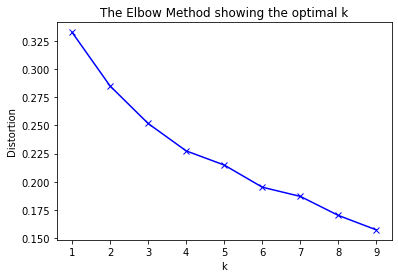

In [146]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(munich_grouped_clustering)
    kmeanModel.fit(munich_grouped_clustering)
    distortions.append(sum(np.min(cdist(munich_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / munich_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()